Resize the camera image to the size of the network input, keeping the aspect ratio.

In [1]:
import argparse
import os
import random
import cv2
import imutils
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

from config import config
from label_codec import LabelCodec

In [2]:
from PIL import Image

class AspectAwarePreprocessor:
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def preprocess(self, image):
        ratio = float(self.width)/image.size[0]
        new_size = tuple([int(x*ratio) for x in image.size])
        image = image.resize(new_size, Image.LANCZOS) # LANCZOS, ANTIALIAS, BILINEAR, BICUBIC, NEAREST
        # create a new image and paste the resized on it
        new_im = Image.new("F", (self.width, self.height))
        y = (self.height - new_size[1]) // 2
        new_im.paste(image, (0, y))        
        return np.array(new_im)

p = AspectAwarePreprocessor(config.IMAGE_WIDTH, config.IMAGE_HEIGHT)

Text(0.5, 1.0, 'KA-W4260')

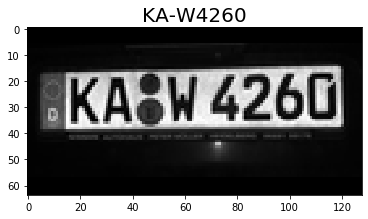

In [3]:
img_filename = random.choice(os.listdir(config.TEST_IMAGES))
img_filepath = os.path.join(config.TEST_IMAGES, img_filename)
label = img_filename.split(".")[0].split("#")[0]

img = Image.open(img_filepath) 
img = p.preprocess(img)

plt.imshow(img, cmap='gray')
plt.title(label, fontsize=20)